# Quantitative and qualitative analysis of the project

This notebook contains both quantitative and visual analysis with comments for the project.

Requirements to re-use the notebook:
- Predictions and GT data
- Dice and Relative volume error (in %) for all datasets to analyse in a csv with the same format as this example:
    
        Model trained on...,Mean Dice (ideal 1),Std,Relative Volume Error (ideal 0),Std

        model1,0.77,0.061,23.656,17.92

        model2,0.409,0.053,114.437,38.122

        model3,0.027,0.046,4.913,40.734

        model4,0.264,0.191,-80.887,17.84

        model5,0.85,0.074,-21.882,11.34

## Lets start by importing our required libraries and data!

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so

### Import data csv for our unseen dataset

Here, we will start with our Basel dataset since the main goal of this project is to see if our aggregated dataset-trained model generalizes better than specialized models.

In [3]:
data_df = pd.read_csv("data_brainhack_2023 - basel.csv")
data_df.head()

,Model trained on...,Mean Dice (ideal 1),Std,Relative Volume Error (ideal 0),Std.1
0,Spine Generic,0.770,0.061,23.656,17.920
1,Inspired,0.409,0.053,114.437,38.122
2,Canproco,0.027,0.046,4.913,40.734
3,sci-colorado,0.264,0.191,-80.887,17.840
4,All Aggregated,0.850,0.074,-21.882,11.340


In [4]:
data_df_sorted = data_df.sort_values(['Mean Dice (ideal 1)'])
data_df_sorted

,Model trained on...,Mean Dice (ideal 1),Std,Relative Volume Error (ideal 0),Std.1
2,Canproco,0.027,0.046,4.913,40.734
3,sci-colorado,0.264,0.191,-80.887,17.840
1,Inspired,0.409,0.053,114.437,38.122
0,Spine Generic,0.770,0.061,23.656,17.920
4,All Aggregated,0.850,0.074,-21.882,11.340


We can already see that the Dice is really good for the aggregated dataset (row 4) compared to other models trained on the individual datasets! Let's plot it.

## Plotting our quantitative results

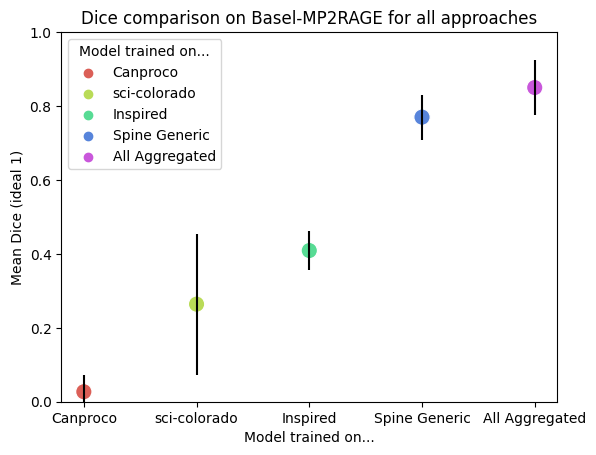

In [30]:
# Here, we will focus on the dice metric...


ax = sns.scatterplot(data=data_df_sorted,x='Model trained on...', y='Mean Dice (ideal 1)', hue='Model trained on...',hue_order=['Canproco','sci-colorado','Inspired','Spine Generic','All Aggregated'], palette='hls',s=140)
ax.errorbar(data=data_df_sorted,x='Model trained on...', y='Mean Dice (ideal 1)', yerr="Std", fmt="none", c='k')
ax.set(title='Dice comparison on Basel-MP2RAGE for all approaches')
ax.set_ylim(top=1,bottom=0)
plt.show()


Now it is clear the, with this test, the aggregated dataset model successfully generalized better than the other specific models to a new and unseen dataset and contrast (mp2rage)!

Let's look at how well the aggregated dataset performs against the respective specific models on their own territory (the test set of the dataset they were trained on).

## Plotting a comparison with the specific models
Here, the data should be formatted like this:

        Model trained on...,Dataset tested	Dice Original Dataset	Std	Dice Aggregated Datasets	Std.1

        model1,0.77,0.061,0.77,0.061

        model2,0.409,0.053,0.409,0.053

        model3,0.027,0.046,0.027,0.046

        model4,0.264,0.191,0.264,0.191

        model5,0.85,0.074,0.85,0.074

In [6]:
data_df_compare = pd.read_csv("data_brainhack_2023 - comparison.csv")
data_df_compare.head()

,Dataset tested,Dice Original Dataset,Std,Dice Aggregated Datasets,Std.1
0,Spine Generic,0.962,0.019,0.958,0.039
1,Inspired,0.990,0.003,0.973,0.006
2,Canproco,0.842,0.101,0.950,0.030
3,sci-colorado,0.936,0.024,0.931,0.022


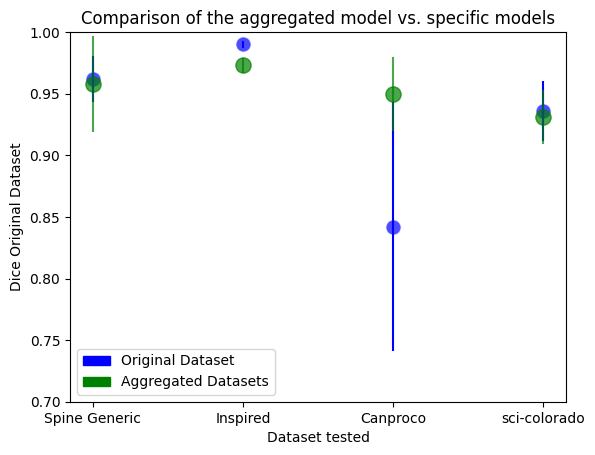

In [49]:
ax2 = sns.scatterplot(data=data_df_compare,x='Dataset tested', y='Dice Original Dataset', c='b',s=120, alpha=0.7)
ax2.errorbar(data=data_df_compare,x='Dataset tested', y='Dice Original Dataset', yerr="Std", fmt="none", c='b', alpha=1)


plt.scatter(data=data_df_compare,x='Dataset tested', y='Dice Aggregated Datasets',s=120, c='g', alpha=0.7)
ax2.errorbar(data=data_df_compare,x='Dataset tested', y='Dice Aggregated Datasets', yerr="Std.1", fmt="none", c='g', alpha=0.7)

ax2.set(title='Comparison of the aggregated model vs. specific models')
ax2.set_ylim(top=1,bottom=0.7)
legend_data = mpatches.Patch(color='b', label='Original Dataset')
legend_data2 = mpatches.Patch(color='g', label='Aggregated Datasets')

plt.legend(handles=[legend_data,legend_data2],loc=3)

plt.show()


Here we can see that the aggregated dataset performs similarly as the others with one exception of the Inspired dataset where the standard deviation and dice is very high for the specific model.

As expected, the aggregated-dataset model performs better in unseen scenarios than all specific models, and stays competitive for in-distribution data.

Now, let's do some visualization on our results for some individuals of the Basel dataset with our different models!

## Qualitative visualizations on our unseen dataset

Let's display the image of a subject and the different predictions produces by our models...

In [51]:
# again, import what is needed to visualize
from nilearn.plotting import view_img
from nilearn import plotting 

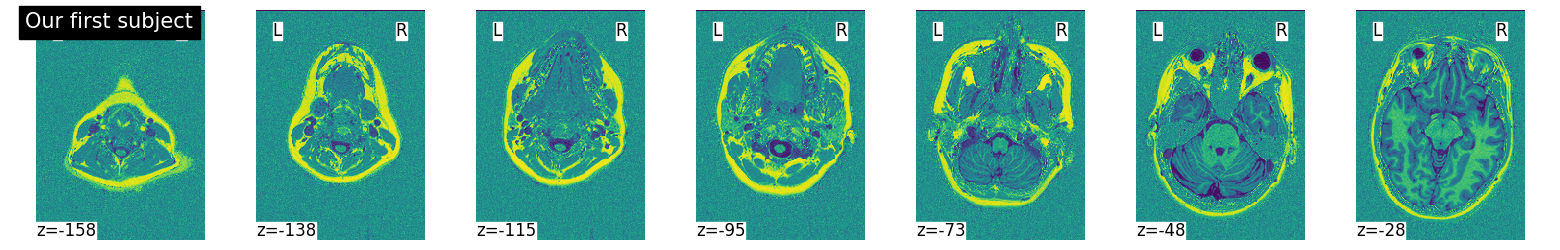

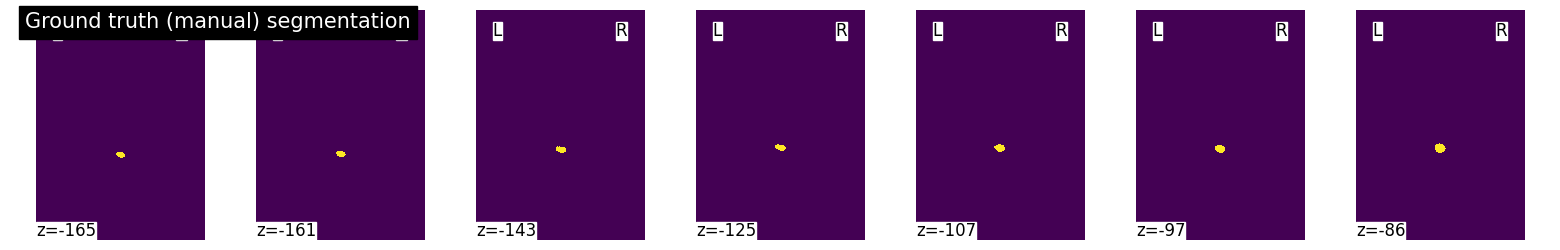

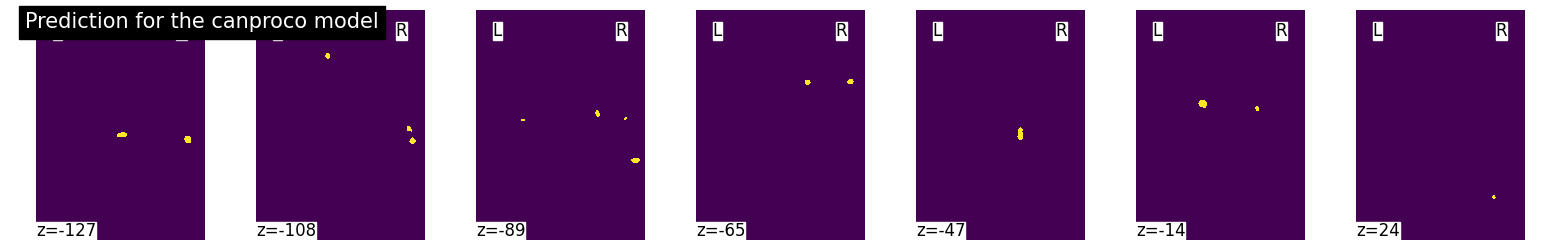

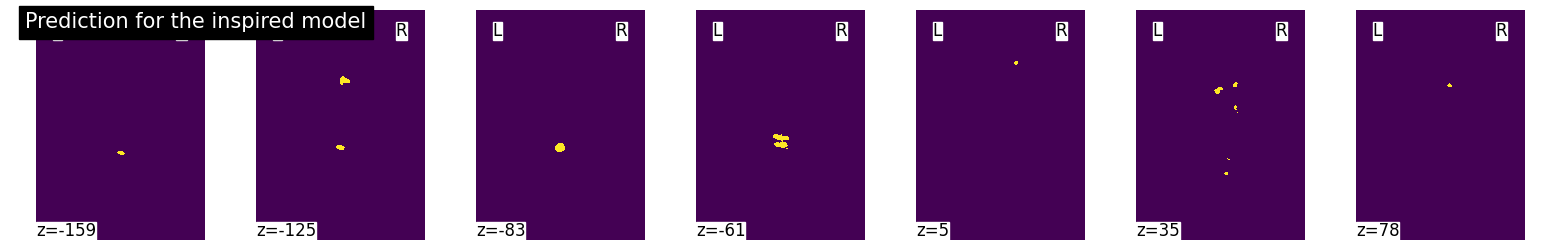

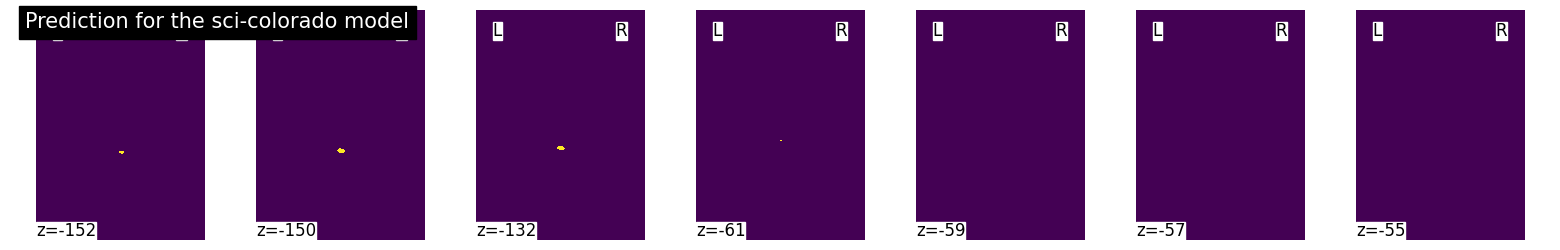

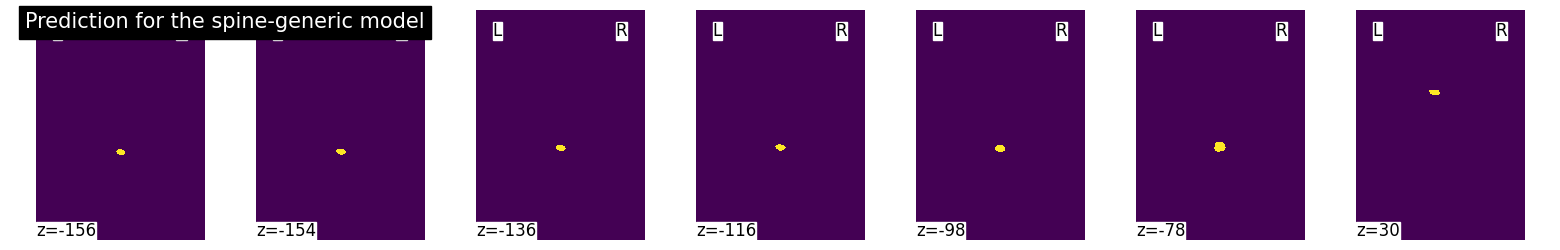

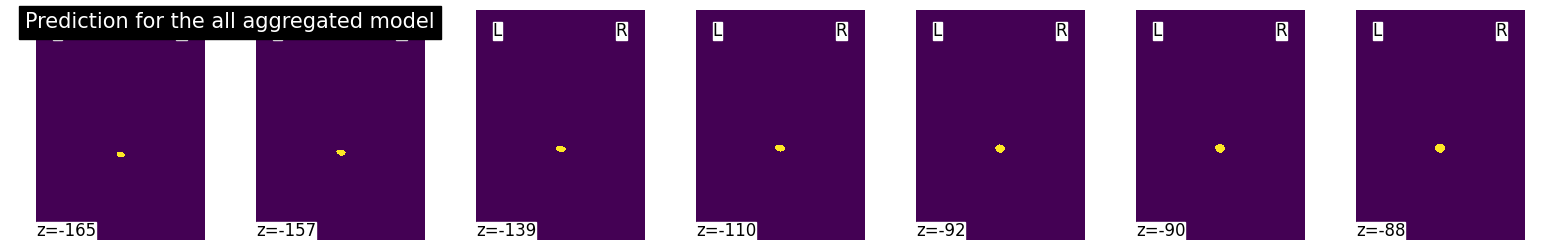

In [71]:
plotting.plot_img('basel_mp2rage_sub-P030-UNIT1_024_0000.nii.gz', display_mode='z', title='Our first subject')
plotting.plot_img('basel_mp2rage_sub-P030-UNIT1_024_manual-seg.nii.gz', display_mode='z', title='Ground truth (manual) segmentation')
plotting.plot_img('canproco_basel_mp2rage_sub-P030-UNIT1_024.nii.gz', display_mode='z', title='Prediction for the canproco model')
plotting.plot_img('inspired_basel_mp2rage_sub-P030-UNIT1_024.nii.gz', display_mode='z', title='Prediction for the inspired model')
plotting.plot_img('colorado_basel_mp2rage_sub-P030-UNIT1_024.nii.gz', display_mode='z', title='Prediction for the sci-colorado model')
plotting.plot_img('spine_generic_basel_mp2rage_sub-P030-UNIT1_024.nii.gz', display_mode='z', title='Prediction for the spine-generic model')
plotting.plot_img('all_aggregated_basel_mp2rage_sub-P030-UNIT1_024.nii.gz', display_mode='z', title='Prediction for the all aggregated model')

We can see how much better (visually) the all aggregated model is here.
And here are some more visual results in the form of gifs...

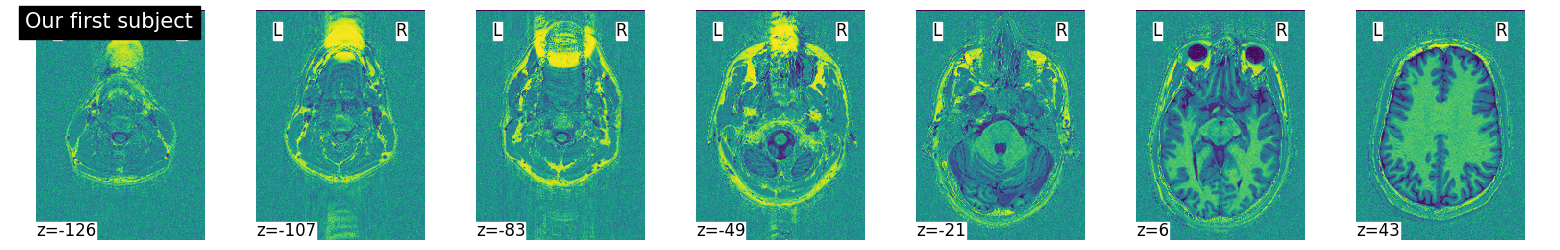

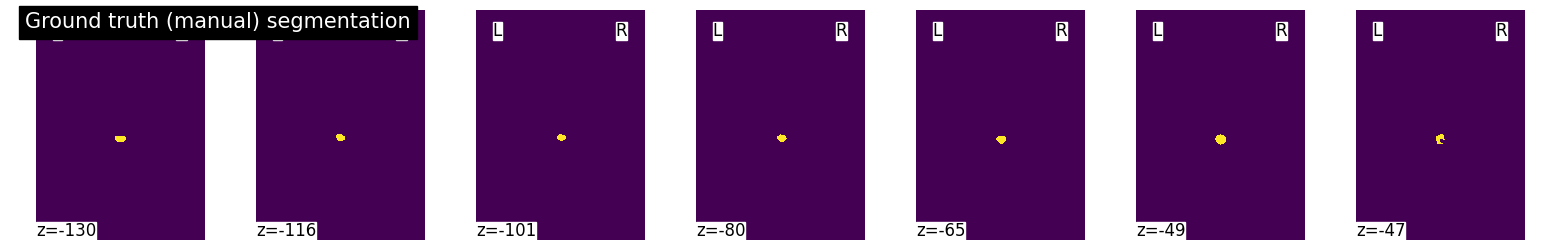

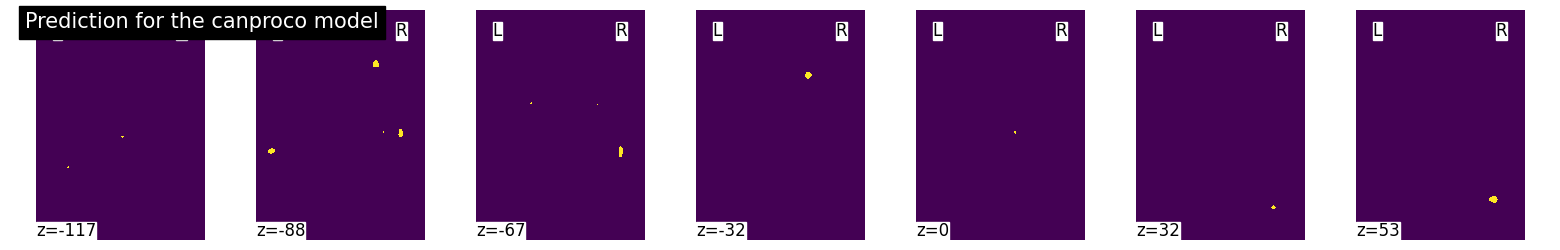

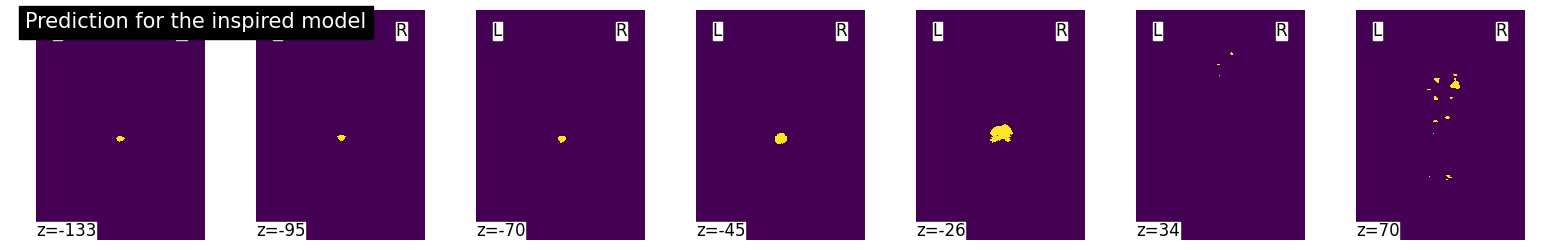

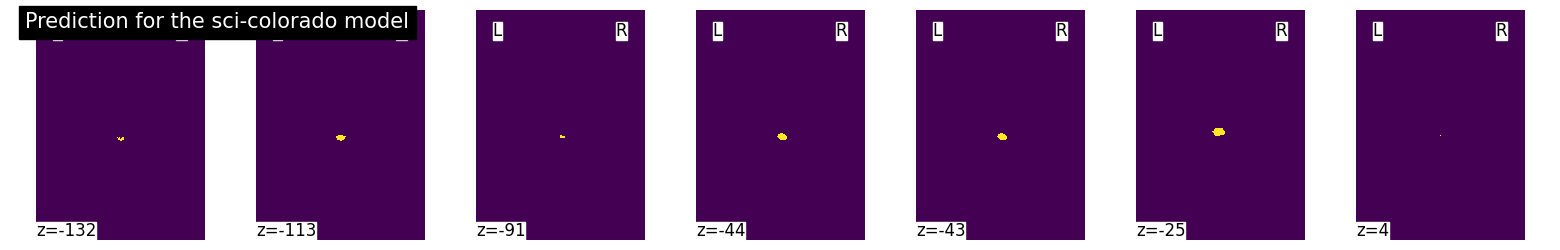

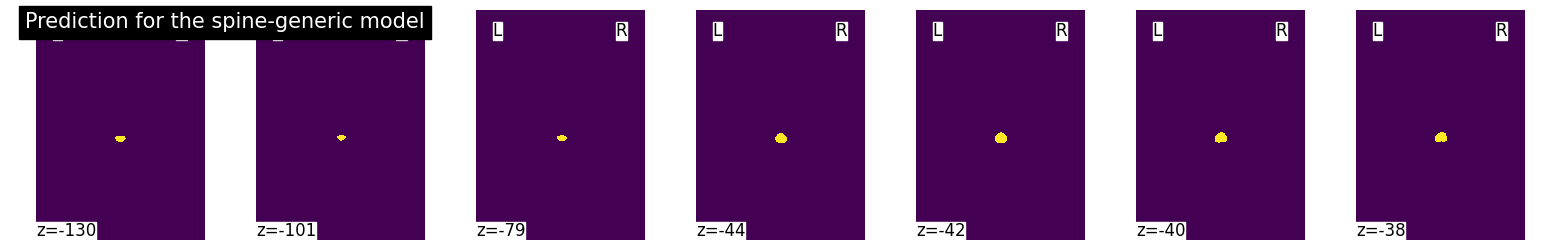

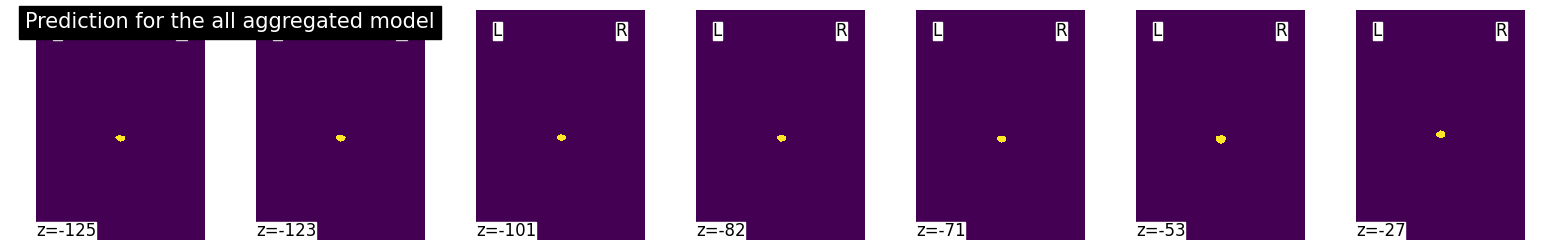

In [72]:
## Let's show another example...
plotting.plot_img('basel_mp2rage_sub-C024-UNIT1_001_0000.nii.gz', display_mode='z', title='Our first subject')
plotting.plot_img('basel_mp2rage_sub-C024-UNIT1_001_manual-seg.nii.gz', display_mode='z', title='Ground truth (manual) segmentation')
plotting.plot_img('canproco_basel_mp2rage_sub-C024-UNIT1_001.nii.gz', display_mode='z', title='Prediction for the canproco model')
plotting.plot_img('inspired_basel_mp2rage_sub-C024-UNIT1_001.nii.gz', display_mode='z', title='Prediction for the inspired model')
plotting.plot_img('colorado_basel_mp2rage_sub-C024-UNIT1_001.nii.gz', display_mode='z', title='Prediction for the sci-colorado model')
plotting.plot_img('spine_generic_basel_mp2rage_sub-C024-UNIT1_001.nii.gz', display_mode='z', title='Prediction for the spine-generic model')
plotting.plot_img('all_aggregated_basel_mp2rage_sub-C024-UNIT1_001.nii.gz', display_mode='z', title='Prediction for the all aggregated model')